![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 4: Tree Based Methods

# Demostration: Random Forest


# 1. Introduction

In this exercise, we will introduce Random Forest and run an example.


## 1.1. Aims of the Exercise:
 1. To demonstrate how Random Forest Trees are build, following an example of Book 1.

 
It aligns with all the learning outcome of our course: 

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.
3.	Construct appropriate training and test sets for health research data.


# 2. Random Forests

Random Forests, like Gradient Boosted Decision Trees, are ensembles of decision trees. Random forests address the issue of overfitting present in decision trees. 
> *A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.*
>
> Introduction to Machine Learning with Python, page 83.

The way to ensure that the trees are slightly different is to introduce some randomness into the model. This is also where Random Forests derive their name. There are two methods of introducing randomness. For each tree, we:
* Randomly sample the data points used to train the tree. This is achieved by taking a *bootstrap sample* of the data.
* Randomly select a subset of the total feature space used to train the tree. Rather than using the whole feature space to find a test for each node, at each node we randomly select a subset of the features, and look for the best test involving one of these sampled features. The number of features that are selected is controlled by the max_features parameter. Please note that this selection of a subset of features is repeated separately in each node, so that each node *within a tree* can make a decision using a different subset of the features.

The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset. Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together, these two randomisations ensure that all the trees in the random forest are different.

## 2.1 Exemplifying example
Here, we replicate the example from the text book, as a quick way to visualise how random forests work. We have to use a dummy data set like this, as it would be very hard to do this for our hospital data, given that the number of features is so large.

In [81]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [82]:
# Generate data
X_example, y_example = make_moons(n_samples=100, noise=0.25, random_state=0)
X_train_example, X_test, y_train_example, y_test_example = train_test_split(X_example, y_example, stratify=y_example, random_state=0)

In [83]:
# Train the random forest.
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train_example, y_train_example)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

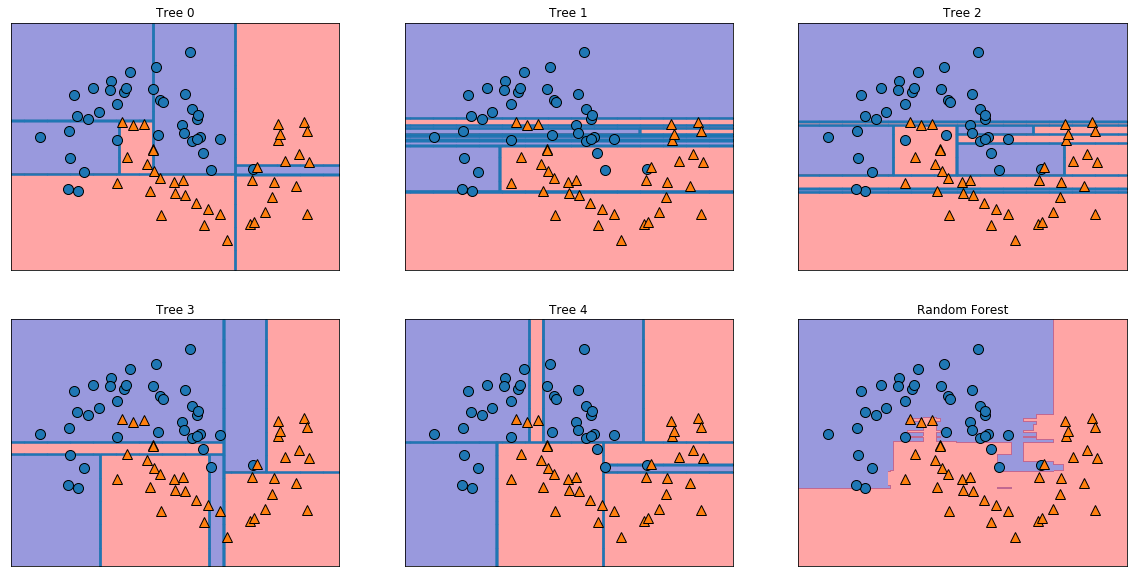

In [84]:
# Plot the individual trees and the random forest.
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train_example, y_train_example, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train_example, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train_example[:, 0], X_train_example[:, 1], y_train_example)

**We can see that each tree overfits and learns the data in different ways. When we aggregate the trees, we form a much more robust classifier.**